## Machine Learning Model - Classification -  kaggle Spaceship Titanic Predictions 

In [34]:
# project details: # https://www.kaggle.com/competitions/spaceship-titanic/overview

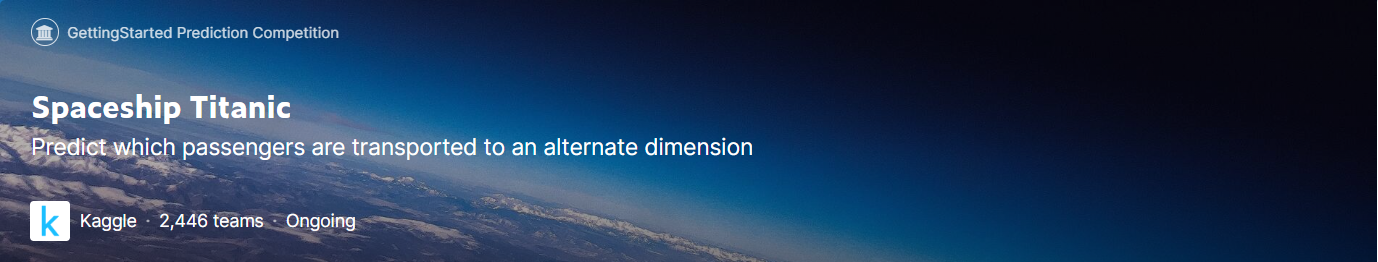

In [35]:
# load the spaceship pic
import os # provide functions for interacting with the operating system
from IPython.display import Image
Image(filename =  r"C:\Users\sing4\OneDrive\Desktop\AI Course\Kaggle Competition\Spaceship Titanic.png",
      width = 1000, height = 900)


## Setting up the  Dependencies for kaggle

In [36]:
# Packages/Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,explained_variance_score, mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# to change scientific number to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

# increase the size of the sns plot
sns.set(rc = {'figure.figsize':(5,5)})

#remove warning
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
pd.options.mode.chained_assignment = None


## 2. Loading and investigationg the data

In [37]:
Path = r'C:\Users\sing4\OneDrive\Desktop\AI Course\Kaggle Competition\spaceship-titanic'
#training data
data = pd.read_csv(Path +'/train.csv')

#evaluation data

eval_data = pd.read_csv(Path + "/test.csv")

sub_example = pd.read_csv(Path + "/sample_submission.csv")

print('Raw data', data.shape)
print("Evaluation data", eval_data.shape)
print("sub_example", sub_example.shape)

Raw data (8693, 14)
Evaluation data (4277, 13)
sub_example (4277, 2)


In [38]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
# Checking for misssing values

data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [40]:
# visualised the data type
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [41]:
# changing the dtype 

string = ('PassengerId', 'HomePlanet', 'CryoSleep',"Cabin", 'Destination','VIP', 'Transported')
numeric = ('Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck')

for s in string:
    data[s] = data[s].astype(str)

for n in numeric:
    data[n] = data[n].astype(float)

In [42]:
# investigating all element within each Features

for column in data:
    try:
        unique_vals = np.unique(data[column])
    except:
        unique_vals = data[column].unique()
        
    nr_val = len(unique_vals)

    if nr_val < 10:
        print("The number of value for feature {} : {} -- {}" .format(column, nr_val, unique_vals))
    else:
        print('The number of value for feature {} : {}'.format(column, nr_val))

The number of value for feature PassengerId : 8693
The number of value for feature HomePlanet : 4 -- ['Earth' 'Europa' 'Mars' 'nan']
The number of value for feature CryoSleep : 3 -- ['False' 'True' 'nan']
The number of value for feature Cabin : 6561
The number of value for feature Destination : 4 -- ['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'nan']
The number of value for feature Age : 81
The number of value for feature VIP : 3 -- ['False' 'True' 'nan']
The number of value for feature RoomService : 1274
The number of value for feature FoodCourt : 1508
The number of value for feature ShoppingMall : 1116
The number of value for feature Spa : 1328
The number of value for feature VRDeck : 1307
The number of value for feature Name : 8474
The number of value for feature Transported : 2 -- ['False' 'True']


## 3. Data Cleaning

In [43]:
# Analysing the Cabin column 
data['Cabin'].unique()
data['Cabin'].value_counts()

nan        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

In [44]:
#Spliting the cabin data into 3

# creating a copy of row data file
data_clean = data.copy()

# adding 3 more columns
data_clean[['Deck', 'Number', 'Side']]= data_clean['Cabin'].str.split('/', expand = True)

del data_clean['Cabin']

data_clean.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


## 4. Visualizating the Data

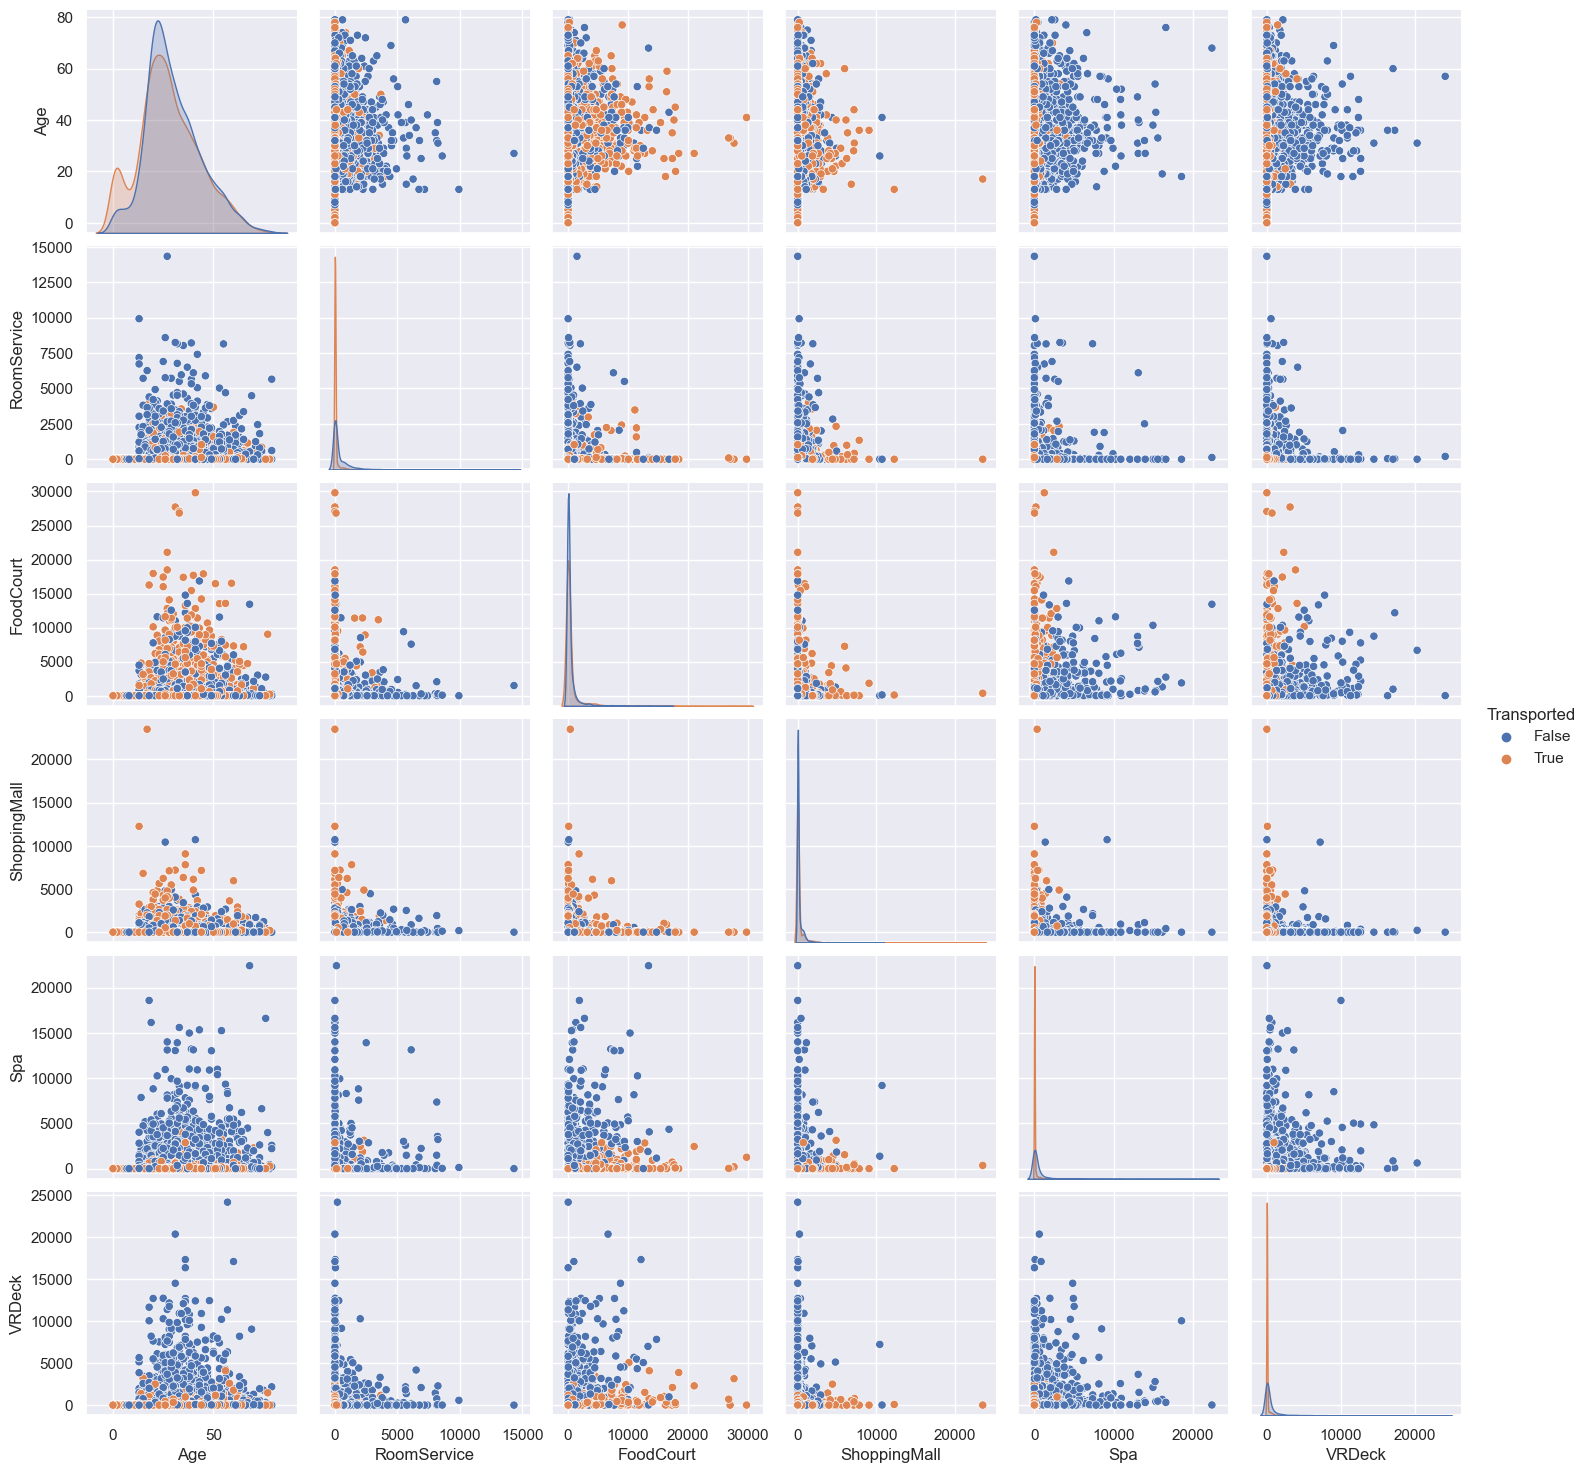

In [45]:
# Visualize the numerical column data using seaborn Pairplots to ascertain any relationship between features
view = sns.pairplot(data_clean[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']], 
                    hue = "Transported")

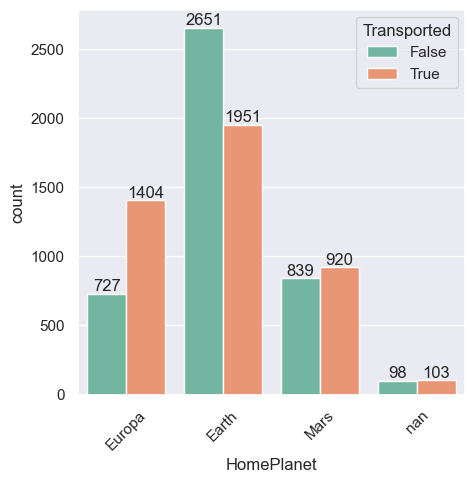

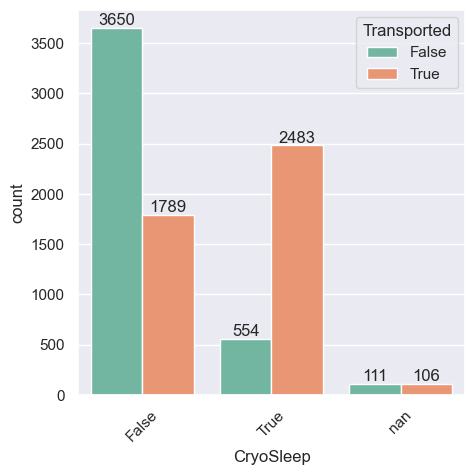

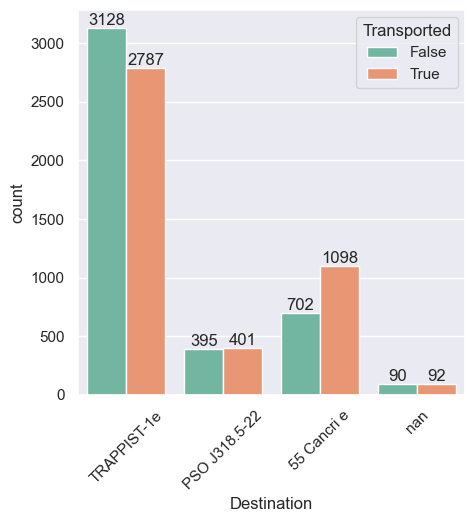

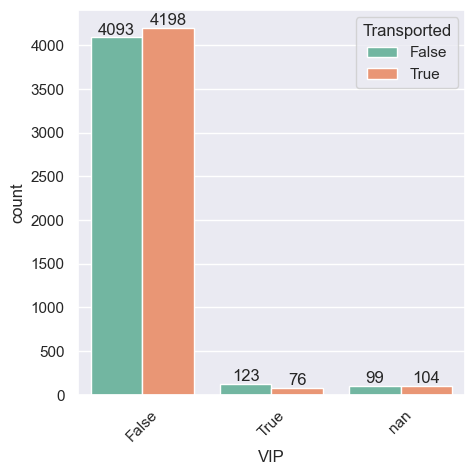

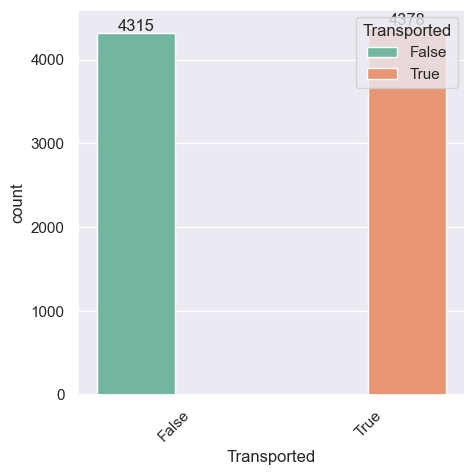

In [46]:
# Analysing the categorical column
categories = ['HomePlanet', 'CryoSleep','Destination','VIP', 'Transported']

for feature in categories:
    ax = sns.countplot(x = feature, data = data_clean, palette = 'Set2', hue = "Transported")
    
    for label in ax.containers:
        ax.bar_label(label)
    plt.xticks(rotation = 45)
    plt.show()


#### Comment:

- As it is visible most of the person transported is from planet Earth followed by Europa.
- The highest number of people transported was the one who was not elected to be put into suspended animation for the duration of the voyage (CryoSleep).
- Most of the people has been transported to TRAPPIST-1e
- There was no much difference between the transported passenger who had paid special VIP service during the voyage or not.

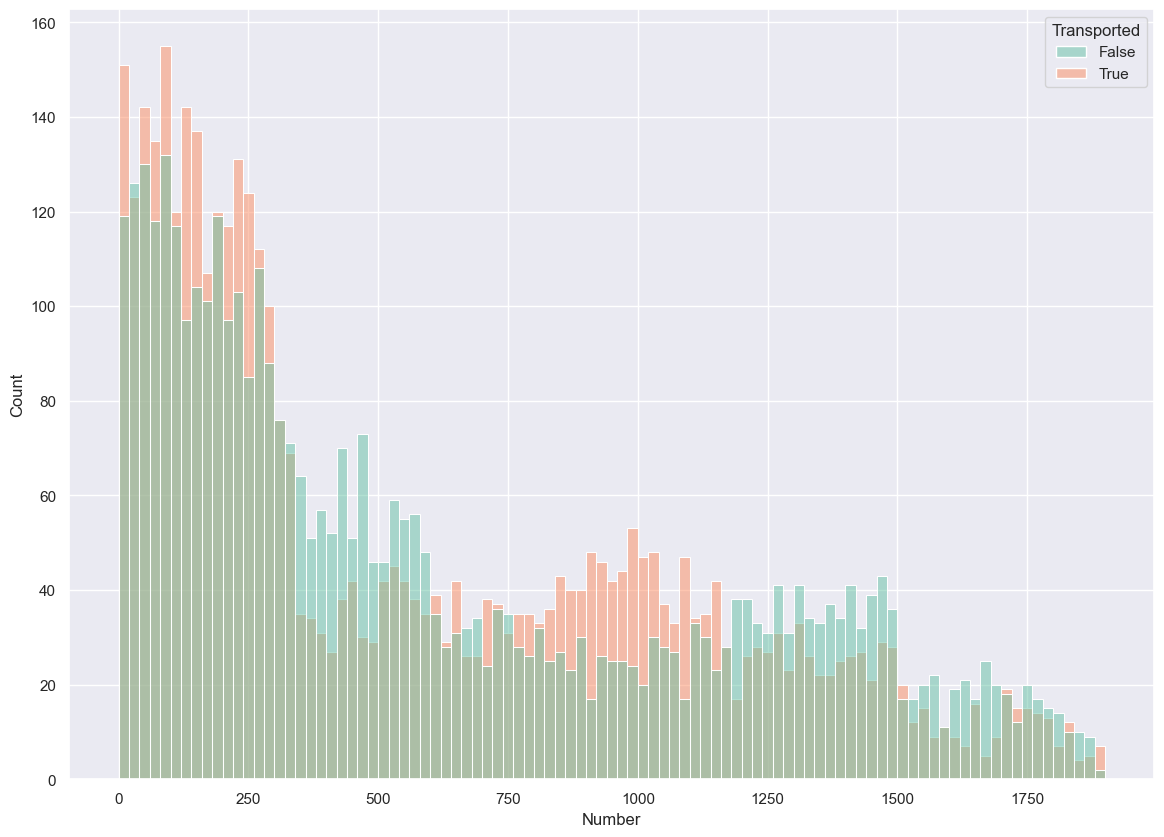

In [48]:
# Increasing the size of sns plot
sns.set(rc= {'figure.figsize':(14,10)})

num_test_raw = data_clean.copy()

num_test_raw = num_test_raw[~num_test_raw['Number'].isna()]
num_test_raw['Number'] = num_test_raw['Number'].astype(int)

graph = sns.histplot(x = 'Number', data = num_test_raw, palette = 'Set2', hue = "Transported", binwidth= 20 )




Comment: it appear that cabin number between  750 and 1200 has transported higher number of travellers. 

In [74]:
# Grouping the Cabin knumber into various classes based on findings
data_clean['Number'][data_clean['Number'].isna()] = 99999

data_clean['Number'] = data_clean['Number'].astype(int)

data_clean['Cabin_Category'] = 'Unknown'

data_clean['Cabin_Category'][data_clean['Number']<= 300] = "Cabin Category A"

data_clean['Cabin_Category'][data_clean['Number']> 300] = "Cabin Category B"
data_clean['Cabin_Category'][data_clean['Number']> 600] = "Cabin Category C"
data_clean['Cabin_Category'][data_clean['Number']> 900] = "Cabin Category D"
data_clean['Cabin_Category'][data_clean['Number']> 1200] = "Cabin Category E"
data_clean['Cabin_Category'][data_clean['Number'] > 1500 ] = 'Cabin Category F'
data_clean['Cabin_Category'][data_clean['Number'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
data_clean['Number'][data_clean['Number'] == 99999] = np.nan

data_clean['Cabin_Category'].value_counts()


Cabin Category A    3569
Cabin Category B    1484
Cabin Category D     991
Cabin Category C     976
Cabin Category E     937
Cabin Category F     459
Cabin Category G     277
Name: Cabin_Category, dtype: int64

## 5. Missing Values

Since there is a lot of missing values for each variable (not the same row), I will try to fill in the missing values and not drop them. One of the most common techniques is to replace the continues values with the median and the categorical features with the mode

In [83]:
# Changing Missing Value to mode and median

category = ['Name','HomePlanet', 'CryoSleep', 'Destination','VIP','Transported', 'Deck', 'Cabin_Category', 'Side']

Numeric = ['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Number']

for value in category:
    
    mode = data_clean[value].mode()[0]
    
    data_clean[value] = data_clean[value].fillna(mode)
    data_clean[value][data_clean[value]== 'nan'] = mode
    
    
for num in numeric:
    
    median = data_clean[num].median()
    
    data_clean[num] = data_clean[num].fillna(median)
    data_clean[num][data_clean[num]== 'nan'] = median
    
    

In [84]:
data_clean.dropna(inplace = True)

# checking for nulls
data_clean.isna().sum()



PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck              0
Number            0
Side              0
Cabin_Category    0
dtype: int64

## 6.Investigating distributions

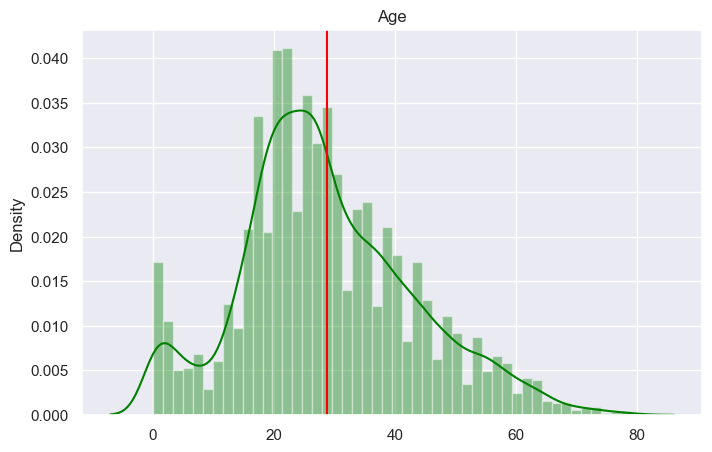

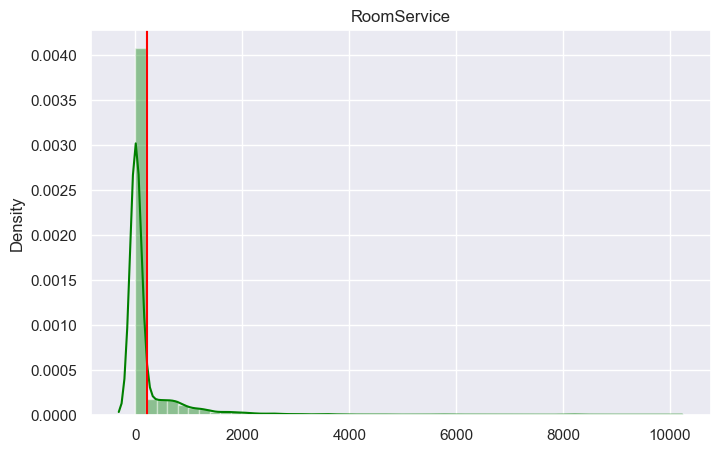

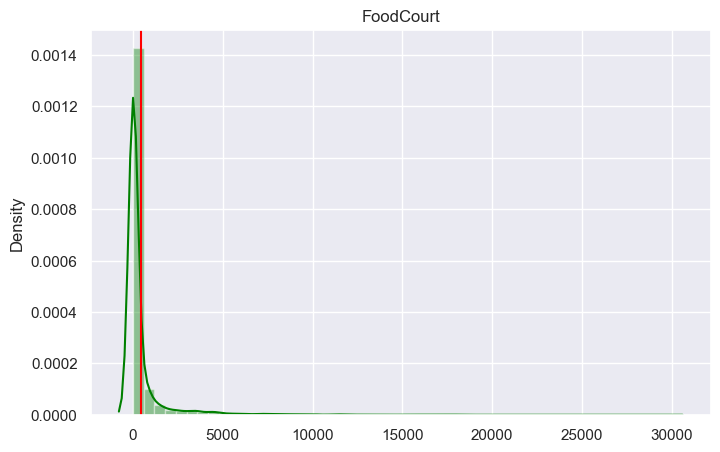

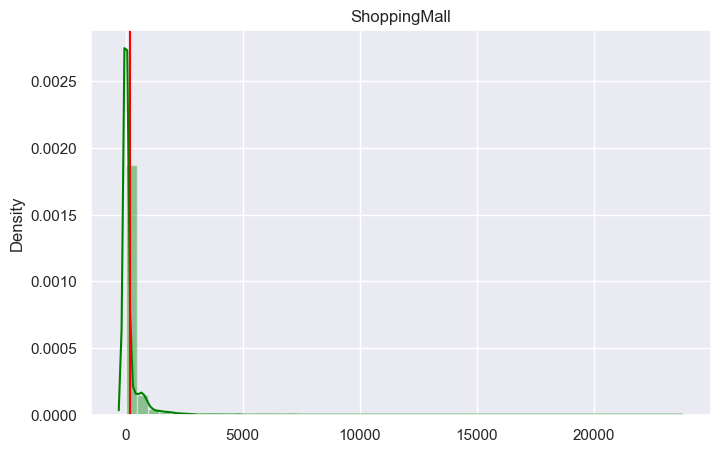

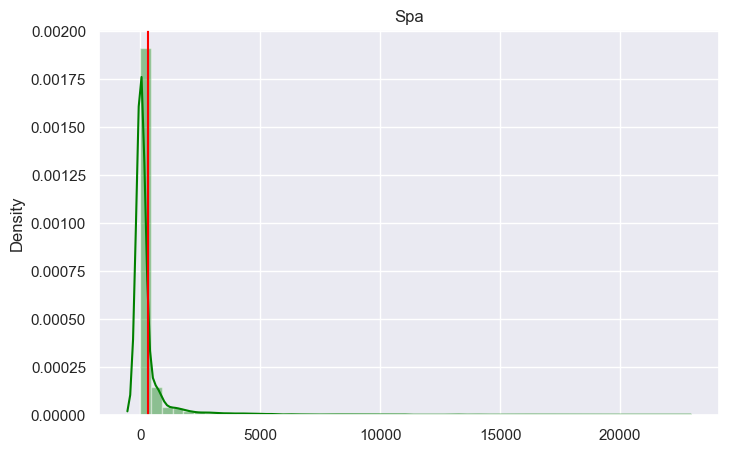

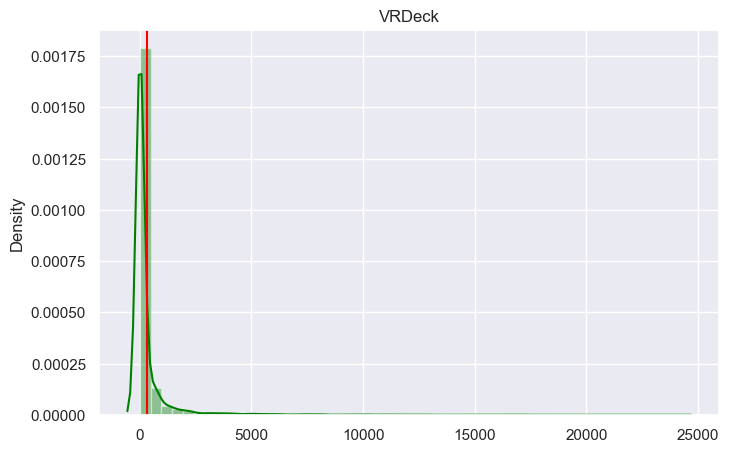

In [85]:
# Investigating the distribution 
# Increases the size of sns plots

sns.set(rc={'figure.figsize':(8,5)})

for n in numeric:
        x= data_clean[n].values
        sns.distplot(x, color = "green");
        
         # Calculating the mean
        mean = data_clean[n].mean()
        
         #ploting the mean
            
        plt.axvline(mean,0,1,color = 'red')
        
        plt.title(n)
        plt.show()

Age
The meadian is:  27.0


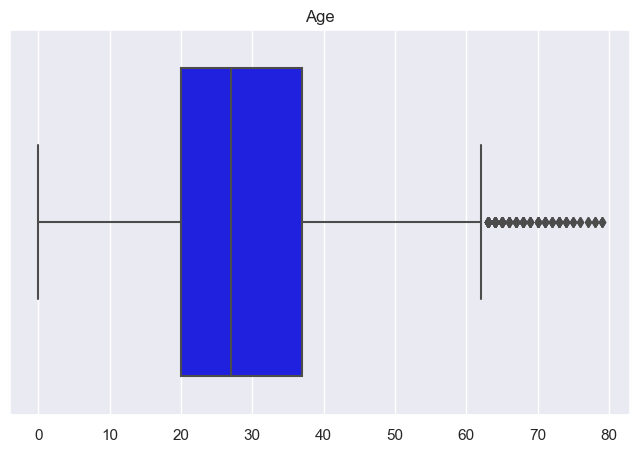

RoomService
The meadian is:  0.0


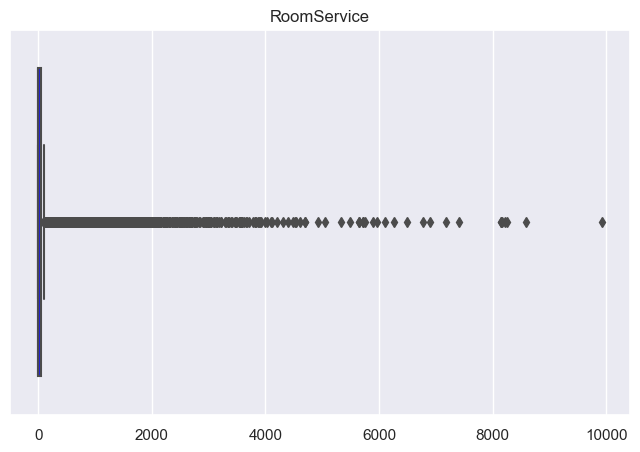

FoodCourt
The meadian is:  0.0


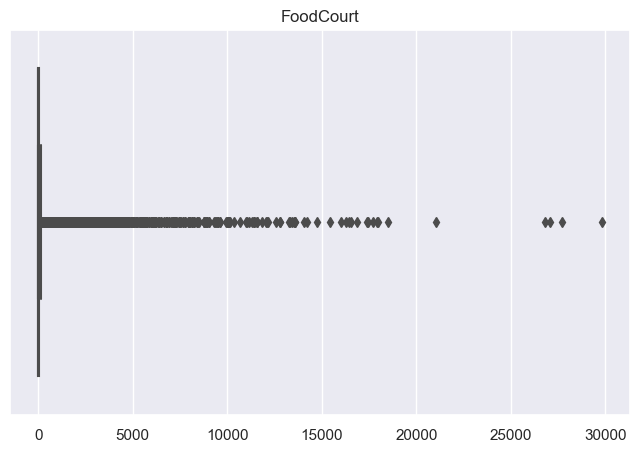

ShoppingMall
The meadian is:  0.0


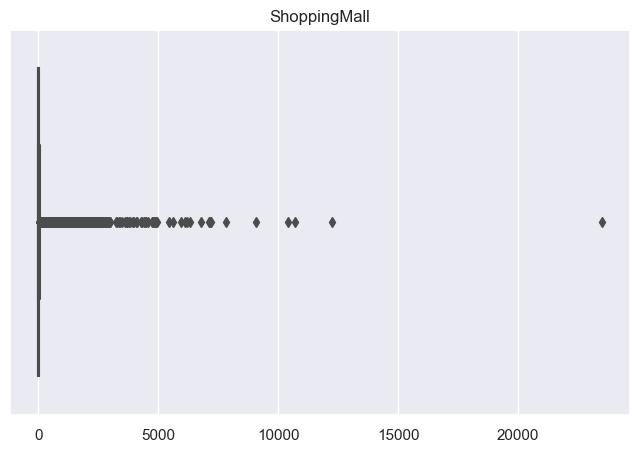

Spa
The meadian is:  0.0


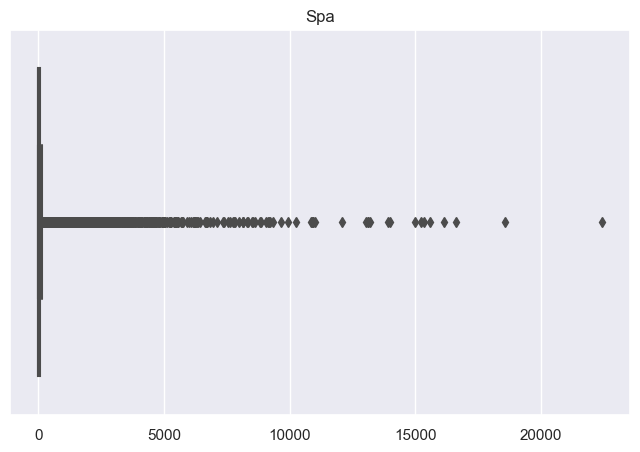

VRDeck
The meadian is:  0.0


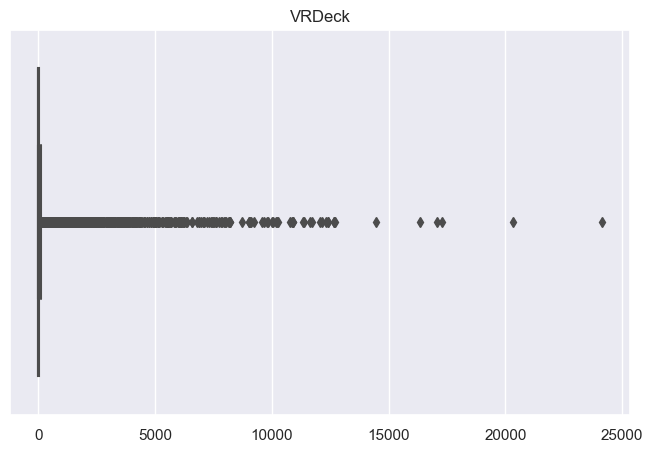

In [86]:
# Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric:
    print(c)
    x = data_clean[c].values
    ax = sns.boxplot(x, color = 'blue')
    print('The meadian is: ', data_clean[c].median())
    plt.title(c)
    plt.show()

In [88]:
# Checking the outliers for food court which shows those who spend more money was transported .
data_clean[data_clean['FoodCourt'] > 20000]

# It can be a good factor for our model.

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Cabin_Category
1213,1292_01,Europa,False,55 Cancri e,31.0,True,0.0,27723.0,3.0,202.0,3146.0,Scharab Conale,True,B,55.0,S,Cabin Category A
1842,1969_01,Europa,False,55 Cancri e,27.0,False,0.0,21066.0,0.0,2448.0,2293.0,Unukath Sandul,True,C,75.0,S,Cabin Category A
2067,2215_01,Europa,False,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True,A,27.0,S,Cabin Category A
3198,3444_01,Europa,False,55 Cancri e,33.0,False,0.0,27071.0,0.0,15.0,0.0,Ainoxa Scerodbox,True,B,131.0,S,Cabin Category A
3538,3796_01,Europa,False,55 Cancri e,33.0,False,90.0,26830.0,0.0,27.0,703.0,Dhena Semageary,True,B,121.0,P,Cabin Category A


## 7 Scalling the data & Turning categorical values to Numeric Representation¶

Conclusion is that I do not want to delete the "outliers" - I will deal with this by scaling the data

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [91]:
data_clean.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Cabin_Category
0,0001_01,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,B,0.0,P,Cabin Category A
1,0002_01,Earth,False,TRAPPIST-1e,0.303797,False,0.010988,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True,F,0.0,S,Cabin Category A
2,0003_01,Europa,False,TRAPPIST-1e,0.734177,True,0.004335,0.119948,0.000000,0.299670,0.002030,Altark Susent,False,A,0.0,S,Cabin Category A
3,0003_02,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False,A,0.0,S,Cabin Category A
4,0004_01,Earth,False,TRAPPIST-1e,0.202532,False,0.030544,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True,F,1.0,S,Cabin Category A


In [92]:
# Making categorical variables into numeric representation

raw_data = pd.get_dummies(data_clean, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])
raw_data.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Number,...,Deck_T,Cabin_Category_Cabin Category A,Cabin_Category_Cabin Category B,Cabin_Category_Cabin Category C,Cabin_Category_Cabin Category D,Cabin_Category_Cabin Category E,Cabin_Category_Cabin Category F,Cabin_Category_Cabin Category G,Side_P,Side_S
0,0001_01,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0.303797,0.010988,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0003_01,0.734177,0.004335,0.119948,0.000000,0.299670,0.002030,Altark Susent,False,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0003_02,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0004_01,0.202532,0.030544,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True,1.0,...,0,1,0,0,0,0,0,0,0,1


## 8. Selecting the important features

#### Heatmap
- First I need to create a "Dataset" to display on a Heatmap - I will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease

In [93]:
raw_data.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported', 'Number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T', 'Cabin_Category_Cabin Category A',
       'Cabin_Category_Cabin Category B', 'Cabin_Category_Cabin Category C',
       'Cabin_Category_Cabin Category D', 'Cabin_Category_Cabin Category E',
       'Cabin_Category_Cabin Category F', 'Cabin_Category_Cabin Category G',
       'Side_P', 'Side_S'],
      dtype='object')

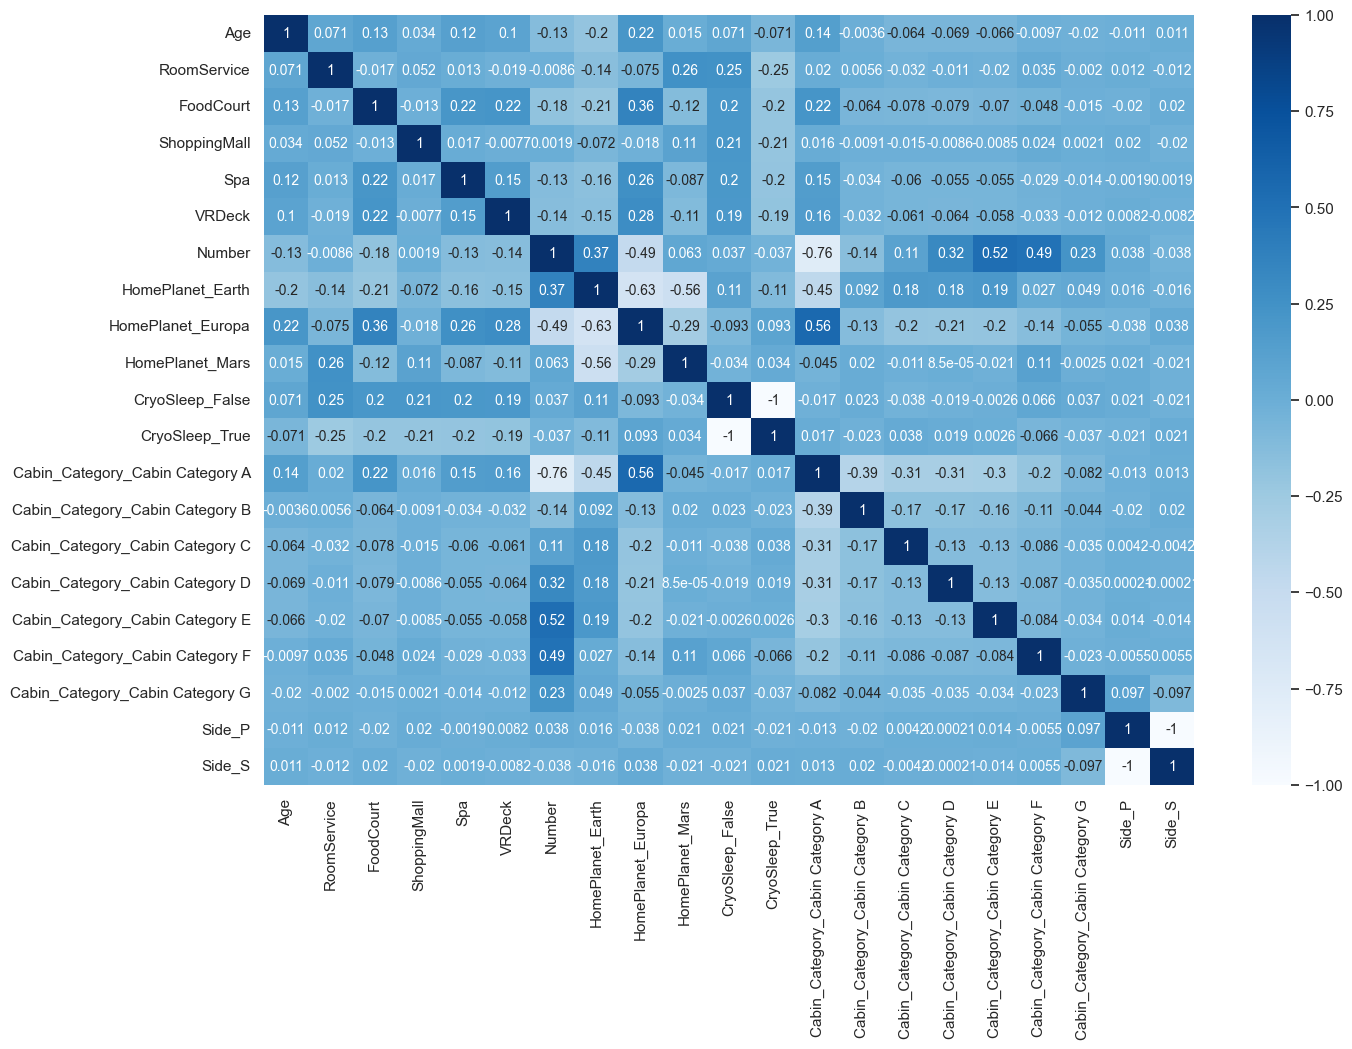

In [95]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_Category_Cabin Category A',
       'Cabin_Category_Cabin Category B', 'Cabin_Category_Cabin Category C',
       'Cabin_Category_Cabin Category D', 'Cabin_Category_Cabin Category E',
       'Cabin_Category_Cabin Category F', 'Cabin_Category_Cabin Category G',
       'Side_P', 'Side_S']

pc = raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

It doesn't help much to get the feature to use in the model and hence I have to use othe method for feature selection.

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- I measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

In [97]:
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = raw_data.drop(['Transported','PassengerId','Name'], axis = 1).values
X_columns = raw_data.drop(['Transported','PassengerId','Name'], axis = 1)
y = raw_data['Transported']

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# Calculating FI
for i, column in enumerate(raw_data.drop(['Transported','PassengerId','Name'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi


(8494, 34)
(8494,)
Importance of feature Age:, 0.055
Importance of feature RoomService:, 0.057
Importance of feature FoodCourt:, 0.075
Importance of feature ShoppingMall:, 0.019
Importance of feature Spa:, 0.096
Importance of feature VRDeck:, 0.103
Importance of feature Number:, 0.067
Importance of feature HomePlanet_Earth:, 0.014
Importance of feature HomePlanet_Europa:, 0.011
Importance of feature HomePlanet_Mars:, 0.005
Importance of feature CryoSleep_False:, 0.000
Importance of feature CryoSleep_True:, 0.301
Importance of feature Destination_55 Cancri e:, 0.001
Importance of feature Destination_PSO J318.5-22:, 0.005
Importance of feature Destination_TRAPPIST-1e:, 0.006
Importance of feature VIP_False:, 0.000
Importance of feature VIP_True:, 0.000
Importance of feature Deck_A:, 0.001
Importance of feature Deck_B:, 0.000
Importance of feature Deck_C:, 0.008
Importance of feature Deck_D:, 0.002
Importance of feature Deck_E:, 0.039
Importance of feature Deck_F:, 0.004
Importance of fe

,index,Variable,Feature Importance Score
0,11,CryoSleep_True,0.300630
1,5,VRDeck,0.103277
2,4,Spa,0.095897
3,2,FoodCourt,0.075218
4,23,Deck_G,0.071317
5,6,Number,0.067325
6,1,RoomService,0.056999
7,0,Age,0.055379
8,21,Deck_E,0.039122
9,33,Side_S,0.022229


## 9. Training & Running the classification model

In [111]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# running the model
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
y_pred = clf.predict(X)

print('Score', clf.score(X, y))

pred_proba_t = clf.predict_proba(X)

log_loss = log_loss(y, pred_proba_t)

log_loss


print('Log Loss', log_loss)


Score 0.8092771368024488
Log Loss 0.3964220607633012


## Pre-processing the Test data & Running the model on it 

In [106]:
######################################     Loading the data   #############################################
test_data = pd.read_csv(r"C:\Users\sing4\Kaggle titanic Spaceship Contest\test.csv")

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

######################################     # chaning the types so we can visualize   #####################################
strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    test_data[s] = test_data[s].astype(str)
    
for n in numeric:
    test_data[n] = test_data[n].astype(float)

##################################     # adding 3 more columns   #############################################
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True) 

del test_data['Cabin']

############################     # creating a new field for cabin number based on findings   #############################################

test_data['Num'][test_data['Num'].isna()] = 99999
test_data['Num'] = test_data['Num'].astype(int)

test_data['Cabin_Category'] = 'Uknown'
test_data['Cabin_Category'][test_data['Num'] <= 300 ] = 'Cabin Category A'
test_data['Cabin_Category'][test_data['Num'] > 300 ] = 'Cabin Category B'
test_data['Cabin_Category'][test_data['Num'] > 600 ] = 'Cabin Category C'
test_data['Cabin_Category'][test_data['Num'] > 900 ] = 'Cabin Category D'
test_data['Cabin_Category'][test_data['Num'] > 1200 ] = 'Cabin Category E'
test_data['Cabin_Category'][test_data['Num'] > 1500 ] = 'Cabin Category F'
test_data['Cabin_Category'][test_data['Num'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
test_data['Num'][test_data['Num'] == 99999] = np.nan

##################################        changing missing values to mode and median   ##################################

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = test_data[s].mode()[0]
    test_data[s]= test_data[s].fillna(mode)
    test_data[s][test_data[s] == 'nan'] = mode
    
for n in numeric2:
    test_data[n]= test_data[n].astype(float)
    median = test_data[n].median()
    test_data[n]= test_data[n].fillna(median)
    
##################################        Scaling the data   ##################################
test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(test_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


##################################         Making categorical variables into numeric representation      ##################################        
test_data = pd.get_dummies(test_data, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])


##################################       # Split the data into X & y        ##################################       

X_test = test_data.drop(['PassengerId','Name'], axis = 1).values

 
###############################        Making Predictions       #################################
y_pred = clf.predict(X_test)


###############################       # creating the output      ###############################       
evaluation_data = pd.read_csv(r"C:\Users\sing4\Kaggle titanic Spaceship Contest\test.csv")
evaluation_data['Transported'] = y_pred

output = evaluation_data[['PassengerId','Transported']]


# Output to csv
output.to_csv('submission.csv', index=False)




In [107]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
